In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


4423680/4422102 [==============================] - 0s 0us/step


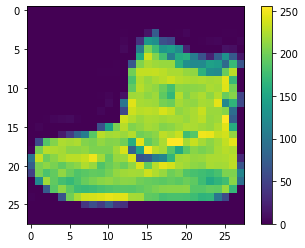

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)                        
])

In [ ]:
prediction = model(x_train[:1]).numpy()
prediction

array([[-1.0128051 , -0.35007685, -0.1454915 , -0.2377211 ,  0.5917929 ,
         0.18490808, -0.84414774,  1.1952507 ,  0.96468186, -0.6060411 ]],
      dtype=float32)

In [ ]:
tf.nn.softmax(prediction).numpy()

array([[0.02874555, 0.05576862, 0.068429  , 0.06240011, 0.1430338 ,
        0.09522059, 0.03402653, 0.26152736, 0.2076741 , 0.04317437]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()

3.1425083

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5123 - accuracy: 0.8217
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3864 - accuracy: 0.8617
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3493 - accuracy: 0.8733
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3266 - accuracy: 0.8802
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3102 - accuracy: 0.8859
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8907
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2863 - accuracy: 0.8921
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2775 - accuracy: 0.8966
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.8999
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.260

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3398 - accuracy: 0.8755


[0.33984193205833435, 0.8755000233650208]

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


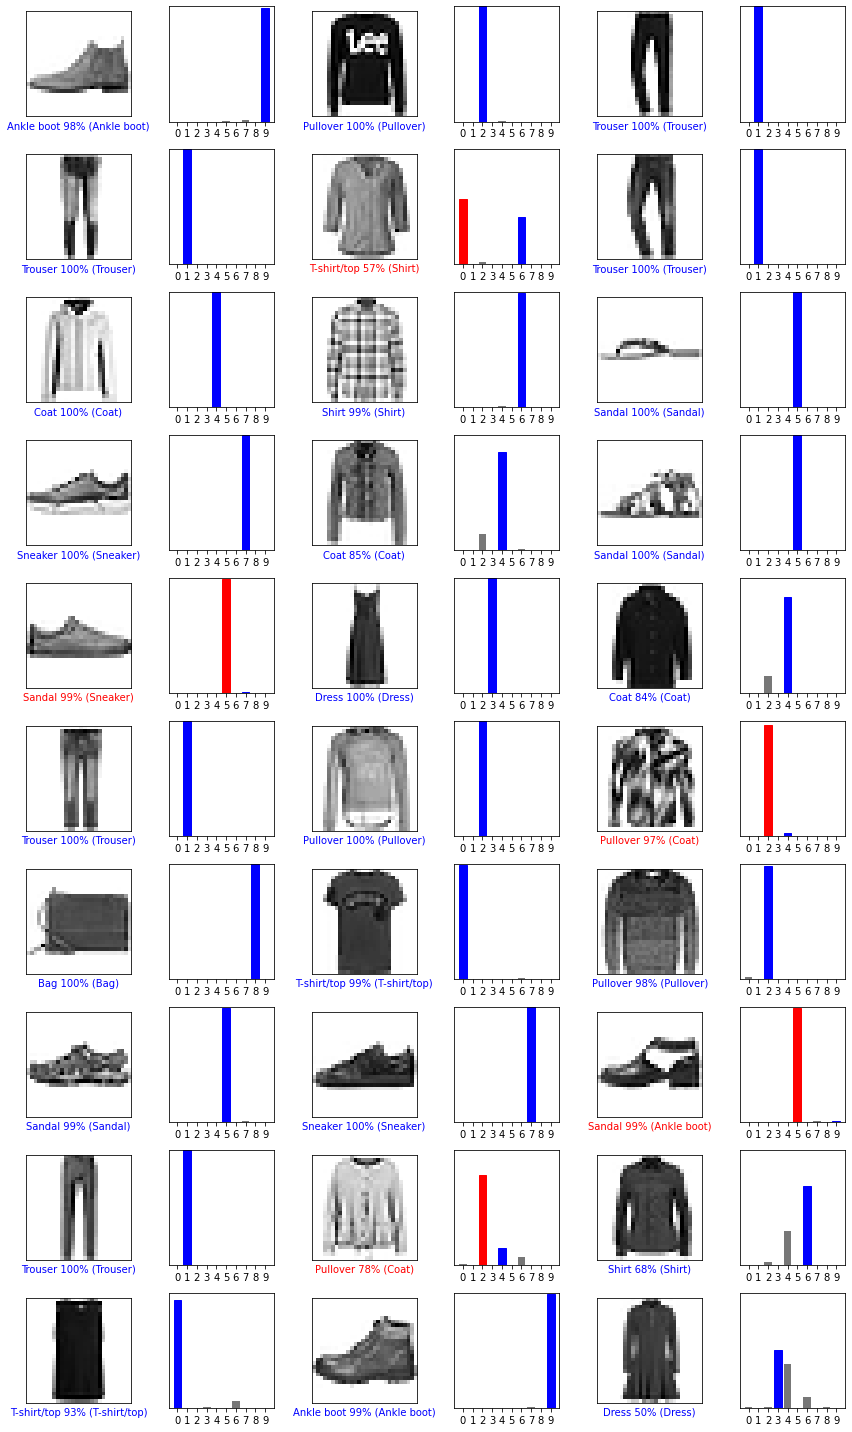

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


